In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing 


In [19]:
ds=pd.read_csv('car1_data.csv')
ds

,Model,Selling_Price,Kilometers_Driven,Year,Owner,Fuel_Type,Transmission,Insurance,Car_Condition
0,MarutiWagonR1.0LXI,312165,82238,2014,First Owner,Petrol + CNG,MANUAL,Expired,4.2
1,ToyotaEtiosLiva,313799,30558,2013,First Owner,Petrol,MANUAL,12-09-2021,4.4
2,MarutiAlto800,295999,22164,2018,First Owner,Petrol,MANUAL,01-12-2020,4.8
3,MarutiSwift,435199,30535,2013,First Owner,Diesel,MANUAL,Comp,4.3
4,MarutiWagonR1.0,289099,15738,2013,First Owner,Petrol,MANUAL,11-08-2021,4.3
...,...,...,...,...,...,...,...,...,...
2232,MarutiWagonR1.0,385999,45263,2015,Second Owner,Petrol,MANUAL,10-06-2021,4.4
2233,MarutiSwift,324099,100335,2012,Second Owner,Petrol,MANUAL,02-08-2021,4.3
2234,HyundaiEonD,212299,28016,2011,First Owner,Petrol,MANUAL,Expired,3.2
2235,FordEcosport1.5AMBIENTE,378899,87947,2013,First Owner,Diesel,MANUAL,03-09-2021,4.2


In [20]:
#checking the number of rows and colums
ds.shape

(2237, 9)

In [21]:
#getting information about the dataset 
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              2237 non-null   object 
 1   Selling_Price      2237 non-null   int64  
 2   Kilometers_Driven  2237 non-null   int64  
 3   Year               2237 non-null   int64  
 4   Owner              2237 non-null   object 
 5   Fuel_Type          2237 non-null   object 
 6   Transmission       2237 non-null   object 
 7   Insurance          2223 non-null   object 
 8   Car_Condition      2237 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 157.4+ KB


In [22]:
#checking the number of missing values
ds.isnull().sum()

Model                 0
Selling_Price         0
Kilometers_Driven     0
Year                  0
Owner                 0
Fuel_Type             0
Transmission          0
Insurance            14
Car_Condition         0
dtype: int64

In [15]:
#checking the distribution of catagorical data
ds.Transmission.value_counts()


MANUAL       1909
AUTOMATIC     170
HR26            9
MH02            9
DL4C            8
MH12            8
KA05            7
MH03            6
DL12            6
MH04            6
KA01            5
MH01            5
KA03            4
MH47            4
DL3C            4
MH43            4
KA50            4
KA51            4
HR51            4
DL5C            4
RJ14            3
DL8C            3
KA04            3
KA53            3
TS07            3
GJ27            3
MH14            2
DL2C            2
UP32            2
TS08            2
MH05            2
KA02            2
UP14            2
PB11            1
DL11            1
HR05            1
TS09            1
TN12            1
PB10            1
GJ06            1
DL14            1
HR12            1
DL1C            1
Ch01            1
HR03            1
UP78            1
MH46            1
TN06            1
DL9C            1
GJ01            1
GJ05            1
DL10            1
HR29            1
GJ18            1
TN02            1
PB91      

In [23]:
ds.Fuel_Type.value_counts()

Petrol          1384
Diesel           686
Petrol + CNG     158
Petrol + LPG       9
Name: Fuel_Type, dtype: int64

In [24]:
ds.Owner.value_counts()

First Owner     1707
Second Owner     452
Third Owner       78
Name: Owner, dtype: int64

   Encoding the Categorical Data

In [27]:
#encoding 'Fuel_Type' column
ds.replace({'Owner':{'First Owner':0,'Second Owner':1,'Third Owner':2}},inplace=True )

In [28]:
ds.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'Petrol + CNG':2,'Petrol + LPG':3}},inplace=True)

In [29]:
ds.replace({'Transmission':{'MANUAL':0,'AUTOMATIC':1}},inplace=True)

In [30]:
ds

,Model,Selling_Price,Kilometers_Driven,Year,Owner,Fuel_Type,Transmission,Insurance,Car_Condition
0,MarutiWagonR1.0LXI,312165,82238,2014,0,2,0,Expired,4.2
1,ToyotaEtiosLiva,313799,30558,2013,0,0,0,12-09-2021,4.4
2,MarutiAlto800,295999,22164,2018,0,0,0,01-12-2020,4.8
3,MarutiSwift,435199,30535,2013,0,1,0,Comp,4.3
4,MarutiWagonR1.0,289099,15738,2013,0,0,0,11-08-2021,4.3
...,...,...,...,...,...,...,...,...,...
2232,MarutiWagonR1.0,385999,45263,2015,1,0,0,10-06-2021,4.4
2233,MarutiSwift,324099,100335,2012,1,0,0,02-08-2021,4.3
2234,HyundaiEonD,212299,28016,2011,0,0,0,Expired,3.2
2235,FordEcosport1.5AMBIENTE,378899,87947,2013,0,1,0,03-09-2021,4.2


Spliting data into Training data and Test data

In [43]:
X=ds.drop(['Model','Selling_Price','Insurance','Transmission'],axis=1)
Y=ds.Selling_Price
Z=ds.Insurance
A=ds.Transmission

In [44]:
X

,Kilometers_Driven,Year,Owner,Fuel_Type,Car_Condition
0,82238,2014,0,2,4.2
1,30558,2013,0,0,4.4
2,22164,2018,0,0,4.8
3,30535,2013,0,1,4.3
4,15738,2013,0,0,4.3
...,...,...,...,...,...
2232,45263,2015,1,0,4.4
2233,100335,2012,1,0,4.3
2234,28016,2011,0,0,3.2
2235,87947,2013,0,1,4.2


In [45]:
Y

0       312165
1       313799
2       295999
3       435199
4       289099
         ...  
2232    385999
2233    324099
2234    212299
2235    378899
2236    304299
Name: Selling_Price, Length: 2237, dtype: int64

In [46]:
Z

0          Expired
1       12-09-2021
2       01-12-2020
3             Comp
4       11-08-2021
           ...    
2232    10-06-2021
2233    02-08-2021
2234       Expired
2235    03-09-2021
2236    17-10-2021
Name: Insurance, Length: 2237, dtype: object

In [47]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

Model Training 

In [48]:
#load linear regression model
lin_reg_model=LinearRegression()

In [49]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [50]:
#prediction of training data
training_data_prediction=lin_reg_model.predict(X_train)
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R Squared Error : ",error_score)

R Squared Error :  0.3601336871375733


Visualize of actual and predicted prices

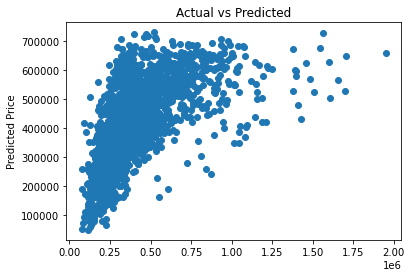

In [51]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel=('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted')
plt.show()

In [52]:
training_data_prediction=lin_reg_model.predict(X_test)
error_score=metrics.r2_score(Y_test,training_data_prediction)
print("R Squared Error : ",error_score)

R Squared Error :  0.2972611964059656


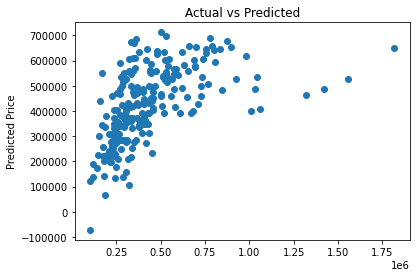

In [53]:
plt.scatter(Y_test,training_data_prediction)
plt.xlabel=('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted')
plt.show()

Lasso Regression 

In [54]:
las_reg_model=Lasso()
las_reg_model.fit(X_train,Y_train)

Lasso()

In [55]:
training_data_prediction=las_reg_model.predict(X_train)
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R Squared Error : ",error_score)

R Squared Error :  0.3601336866522131


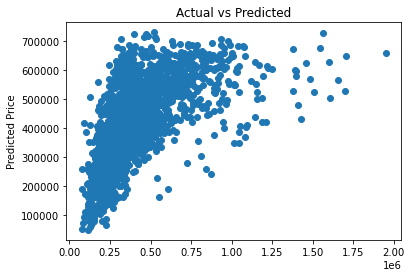

In [56]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel=('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted')
plt.show()

In [57]:
training_data_prediction=las_reg_model.predict(X_test)
error_score=metrics.r2_score(Y_test,training_data_prediction)
print("R Squared Error : ",error_score)

R Squared Error :  0.297263491653333


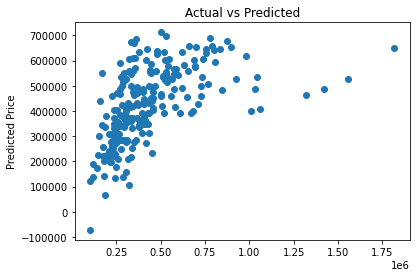

In [58]:
plt.scatter(Y_test,training_data_prediction)
plt.xlabel=('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted')
plt.show()